In [827]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import math
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.loc[:, train.columns != 'Survived']
X_test = test.loc[:, test.columns != 'Survived']
Y_train = train.loc[:, train.columns == 'Survived']

dfs = [X_train, X_test]

In [828]:
dfs[0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [829]:
group_by = train.loc[:, train.columns != 'PassengerId'].groupby(by = 'Survived')

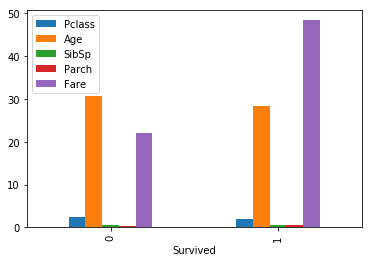

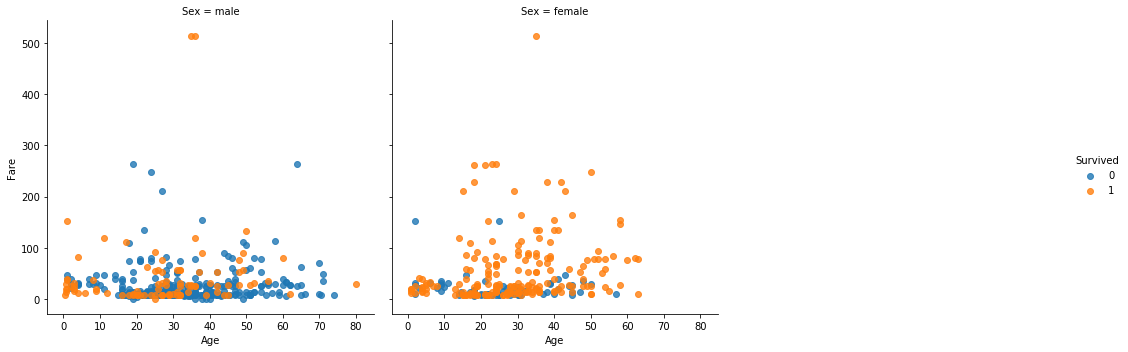

In [830]:
group_by.mean().plot(kind='bar')
sbn.lmplot("Age", "Fare", data=train, hue="Survived", fit_reg=False, col = "Sex", col_wrap = 3)

In [831]:
for i, df in enumerate(dfs):
    dummies = pd.get_dummies(df.loc[:, ['Embarked', 'Pclass', 'Sex']].astype(str), drop_first = True)
    df['cabin_known'] = (df['Cabin'].isnull() == True)
    df['age_known'] = df['Age'].isnull() == True
    df['family_size'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = df['family_size'] == 1
    df['name_len'] = len(df['Name'])
    mean_age = df.loc[df['Age'].isnull() == False, 'Age'].mean()
    df['Age'].fillna(mean_age, inplace = True)
    df = df.join(dummies)
    dfs[i] = df


In [832]:
for df in dfs:
    df.drop(['Ticket', 'Embarked', 'SibSp', 'Pclass', 'Sex', 'Name','Cabin', 'PassengerId'], axis=1, inplace = True)


In [833]:
def standardize(df, col):
    df[col] = (df[col] - df[col].mean()) / df[col].std()

for df in dfs:
    standardize(df, 'Age')
    standardize(df, 'Fare')
    standardize(df, 'Parch')
    standardize(df, 'family_size')    

In [834]:
print(dfs)

[          Age     Parch      Fare  cabin_known  age_known  family_size  \
0   -0.592148 -0.473408 -0.502163         True      False     0.059127   
1    0.638430 -0.473408  0.786404        False      False     0.059127   
2   -0.284503 -0.473408 -0.488580         True      False    -0.560660   
3    0.407697 -0.473408  0.420494        False      False     0.059127   
4    0.407697 -0.473408 -0.486064         True      False    -0.560660   
5    0.000000 -0.473408 -0.477848         True       True    -0.560660   
6    1.869009 -0.473408  0.395591        False      False    -0.560660   
7   -2.130371  0.767199 -0.223957         True      False     1.918486   
8   -0.207592  2.007806 -0.424018         True      False     0.678913   
9   -1.207437 -0.473408 -0.042931         True      False     0.059127   
10  -1.976549  0.767199 -0.311997        False      False     0.678913   
11   2.176654 -0.473408 -0.113782        False      False    -0.560660   
12  -0.745970 -0.473408 -0.486064    

In [835]:
classifiers = {}

from sklearn.svm import SVC
classifiers['svm'] = SVC(kernel = 'linear', C = 0.025)

from sklearn.ensemble import RandomForestClassifier
classifiers['random_forest'] = RandomForestClassifier(random_state=42, n_estimators=200)

from sklearn.linear_model import LogisticRegression
classifiers['logistic_regression'] = LogisticRegression()

import xgboost as xgb
from xgboost import XGBClassifier
# classifiers['xgboost'] = XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=2, subsample=1, max_depth=5)

classifiers['xgboost'] = XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

In [836]:
from sklearn.metrics import *
from sklearn.model_selection import KFold


#cross validation
for key, classifier in classifiers.items():
    folds = 10
    print("Training {} on {} folds:".format(key, folds))
    total = 0
    kfold = KFold(n_splits = folds, random_state = 42)
    for train, test in kfold.split(dfs[0]):
        classifier.fit(dfs[0].iloc[train, :], np.ravel(Y_train.iloc[train, :]))
        Y_pred = classifier.predict(dfs[0].iloc[test, :])
        accuracy = accuracy_score(np.ravel(Y_train.iloc[test, :]), Y_pred)
#         print("Accuracy: " + str(accuracy))
        total += accuracy
    print("CV Average accuracy on {} folds: {}\n".format(folds, total / 10))


Training svm on 10 folds:
CV Average accuracy on 10 folds: 0.7878526841448191

Training random_forest on 10 folds:
CV Average accuracy on 10 folds: 0.8047815230961298

Training logistic_regression on 10 folds:
CV Average accuracy on 10 folds: 0.8047191011235955

Training xgboost on 10 folds:


/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: De

CV Average accuracy on 10 folds: 0.818227215980025



/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [837]:
#training on entire set
for key, classifier in classifiers.items():
    print("\nTraining {} :".format(key))
    classifier.fit(dfs[0], np.ravel(Y_train))
    Y_pred = classifier.predict(dfs[0])
    accuracy = accuracy_score(np.ravel(Y_train), Y_pred)
    print("Training accuracy: " + str(accuracy))



Training svm :
Training accuracy: 0.792368125701459

Training random_forest :
Training accuracy: 0.9865319865319865

Training logistic_regression :
Training accuracy: 0.8114478114478114

Training xgboost :
Training accuracy: 0.9438832772166106


/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [838]:
dfs[1].insert(10, "Embarked_nan", 0)
dfs[1]['Fare'].fillna(0, inplace = True)

In [839]:
#stacking CV
model_stack = XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

folds = 10
total = 0
kfold = KFold(n_splits = folds, random_state = 42)
for train, test in kfold.split(dfs[0]):
    stack_train = pd.DataFrame()
    stack_test = pd.DataFrame()
    for key, classifier in classifiers.items():
        classifier.fit(dfs[0].iloc[train, :], np.ravel(Y_train.iloc[train, :]))
        stack_train[key] = classifier.predict(dfs[0].iloc[train, :])
        stack_test[key] = classifier.predict(dfs[0].iloc[test, :])
    model_stack.fit(stack_train, np.ravel(Y_train.iloc[train, :]))
    Y_pred = model_stack.predict(stack_test)
    accuracy = accuracy_score(np.ravel(Y_train.iloc[test, :]), Y_pred)
    total += accuracy
print("CV Average accuracy on {} folds: {}\n".format(folds, total / 10))


#stacking training
stack_train = pd.DataFrame()
stack_test = pd.DataFrame()
for key, classifier in classifiers.items():
    stack_train[key] = (classifier.predict(dfs[0]))
    stack_test[key] = (classifier.predict(dfs[1]))

model_stack.fit(stack_train, np.ravel(Y_train))

print(stack_train)

/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: De

/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


CV Average accuracy on 10 folds: 0.8047815230961298

     svm  random_forest  logistic_regression  xgboost
0      0              0                    0        0
1      1              1                    1        1
2      1              1                    1        1
3      1              1                    1        1
4      0              0                    0        0
5      0              0                    0        0
6      0              0                    0        0
7      0              0                    0        0
8      1              1                    1        1
9      1              1                    1        1
10     1              1                    1        1
11     1              1                    1        1
12     0              0                    0        0
13     0              0                    0        0
14     1              0                    1        0
15     1              1                    1        1
16     0              0      

In [843]:
# results = classifiers['random_forest'].predict(dfs[1])
results = model_stack.predict(stack_test)


/Users/malluin/goinfre/conda/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


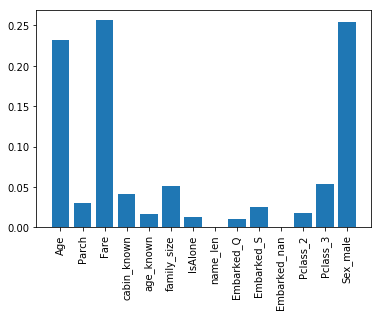

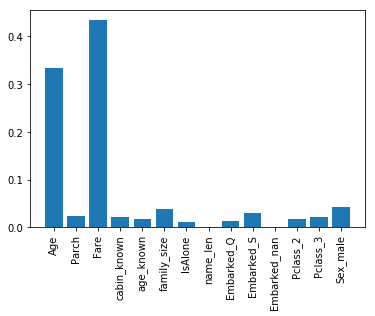

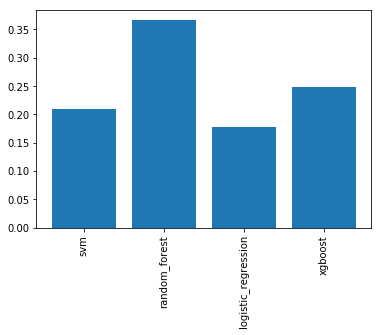

In [848]:
def show_feature_imp(model):
    model = classifiers[model]
    imp = {k:x for k,x in zip(dfs[0].columns, model.feature_importances_)}
    plt.bar(imp.keys(), imp.values())
    plt.xticks(rotation='vertical')
    plt.show()

show_feature_imp('random_forest')
show_feature_imp('xgboost')


#stacking feature_importance
model = model_stack
imp = {k:x for k,x in zip(classifiers.keys(), model.feature_importances_)}
plt.bar(imp.keys(), imp.values())
plt.xticks(rotation='vertical')
plt.show()

In [842]:
import os

if (os.path.exists('submission.txt')):
    os.remove('submission.txt')
with open('submission.txt', 'w') as file:
    file.write("PassengerId,Survived\n")
    for i, result in enumerate(results):
        line = str(i + 892) + ',' + str(result) + '\n'
        file.write(line)
    print("Write successfull")


Write successfull
